In [1]:
import torch
import torch.nn as nn

In [2]:
class SimpleLinearModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(SimpleLinearModel,self).__init__()
        self.linear = nn.Linear(in_features=input_size,out_features=output_size)


    def forward(self,x):
        output=self.linear(x)
        return output


In [ ]:
# 신경망 구성 : class
class SimpleLinearModel(nn.Module):
    # __init__ : 부품(레이어) 생성,초기화
    def __init__(self,input_size,output_size):
        # 1. 부모 클래스인 Module의 생성자를 반드시 먼저 호출해야함, 안하면 에러 발생
        #()의미:생성하고 호출해라(()없으면 super 가 생성이 안됨)
        #SimpleLinearModel위에서 선언한 class 명 적어야해
        super(SimpleLinearModel,self).__init__()


        # 레이어 생성: self. --> 오브젝트 안에다 만들겠다.
        # 레이어(부품) 생성
        self.linear = nn.Linear(in_features=input_size,out_features=output_size) # y = w*X + b
        # w가 나올려면 input_size 가 필요하고, y가 나올려면 output_size 가 필요함


    # forward override : 부품 조립(=신경망 만든다)
    def forward(self,x): # x 입력데이터 받게 해야함
        output = self.linear(x)
        return output # output 결과(예측값)



In [ ]:
input_dim = 10
output_dim = 5

In [4]:
# 2. 오브젝트 생성
input_dim = 10
output_dim = 5

In [ ]:
model = SimpleLinearModel(input_size)

In [6]:
model = SimpleLinearModel(input_size=input_dim, output_size=output_dim) # 오브젝트 생성(신경망 생성)
                            # __init__도 실행됨 따라서 __init__(self,input_size,output_size) 에서 input_size,output_size도 넣어줘야함


In [ ]:
# 3.모델 구조 출력
print(model)

# 딕셔너리 형태로 출력


SimpleLinearModel(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)


In [ ]:
# 4.모델 파라미터 확인
for name, param in model.named_parameters(): # param:w(가중치)
    print(f'Name:{name}') 
    print(f'Shape:{param.shape}')
    print(f'Requires Grad :{param.requires_grad}')



Name:linear.weight
Shape:torch.Size([5, 10])
Requires Grad :True
Name:linear.bias
Shape:torch.Size([5])
Requires Grad :True


In [ ]:
# 5. 가상 입력 데이터로 순전파 테스트
batch_size = 4
dummy_input = torch.randn(batch_size,input_dim) # 핵심: tensor 들어가야함
                                                # 4x10으로 만들겠다.
output = model(dummy_input) # model.forwad(self,x)
                            # model을 호출하면 바로 forward 호출하게됨(forward단어 없어도 호출된거임!!<쭈의!!!!>)
                        


print(f'Input shape: {dummy_input.shape}')
print(f'Output shape {output.shape}')

# batch 사이즈만큼 아웃풋이 나옴, 결과가 행렬이 나옴


Input shape: torch.Size([4, 10])
Output shape torch.Size([4, 5])


In [3]:
# 20251223
# nn.Sequential: 신경망 모델 구축 , nn.Linear만 사용(1차원 데이터)
import torch
import torch.nn as nn

In [4]:
# 입력:28 X 28 이미지 입력 -> 784 x 1 차원으로 펼친 이미지로 만들어아야함
# 왜?nn.Linear만 사용(1차원 데이터)하니까 1차원으로 만들어야함
# 출력:10개로 분류

input_size = 28*28
output_size = 10
hidden_size = 512

# model_seq = nn.Sequential(                                  # 오브젝트 생성하고, () 사이에 층을 넣어야함
#             # layers
# )
model_seq = nn.Sequential(
    nn.Linear(input_size, hidden_size), #(748,512) : 모델 전체의 입력
    nn.ReLU(),                         #활성화 함수: 신경망의 학습을 활성화함
    nn.Linear(hidden_size,hidden_size), #(512,512) # 층마다 input,output 있다.
    nn.ReLU(),                                       
    nn.Linear(hidden_size,output_size)                         # 모델 전체의 출력 ,<주의>출력층에서 Relu 하면 안됨
)

In [5]:
from torchview import draw_graph
draw_graph(model_seq, input_size=(1, 784))

ModuleNotFoundError: No module named 'torchview'

<img src="./PyTorch nn.Sequentia.png" alt="설명" width="300"/>
<img src="./ReLU 함수의 수학적 그래프_ x축.png" alt="설명" width="500"/>


In [ ]:
# bias는 디폴트가 True
print(model_seq)
print('---------------인덱스로 접근---------------')
print(model_seq[0])
print(model_seq[0].weight.shape) # 한층에만 파라미터가 40만개 나옴....., 신경망은 다 행렬 연산이다.

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)
---------------인덱스로 접근---------------
Linear(in_features=784, out_features=512, bias=True)
torch.Size([512, 784])


In [27]:
# 가상 입력으로 테스트 , 배치 사이즈: 64,64장 이미지
dummy_input = torch.randn(64,input_size)  # 64 X 784로 생성해라
                                          # 64 : 배치사이즈 = 한번에 신경망에 들어가는 data즉, 한번에 64장을 신경망에 넣겠다.
                                          # 여기서는 순전파만 하겠다.

# 함수호출하는 연산자 , 여기서 ():특정함수 호출하는 행성자다
# 포워드를 가져오는데 forward는 (self,x)를 받음 x =입력데이터
# 따라서 dummpy_input = 입력데이터 가져오기

output = model_seq(dummy_input)   


print(f'Input shape: {dummy_input.shape}')
print(f'Output shape : {output.shape}')


Input shape: torch.Size([64, 784])
Output shape : torch.Size([64, 10])


<img src="./PyTorch 모델에 가상 입력 데이.png" alt="설명" width="300"/>

In [34]:
# 특정 레이어에 접근하기
print(model_seq)
print(model_seq[2])
print(model_seq[2].weight.shape)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)
Linear(in_features=512, out_features=512, bias=True)
torch.Size([512, 512])


<활성화함수>
<img src="./ChatGPT Image 2025년 12월 23일 오전 11_58_51.png" alt="설명" width="500"/>

In [38]:
# 층에 이름 부여
from collections import OrderedDict
model_ordered = nn.Sequential(
    OrderedDict([ # 층들이 리스트 안에 튜플 형태로 들어감
        ('input_layer',nn.Linear(input_size,hidden_size)), # Linear
        ('relu1',nn.ReLU()), # ReLU
        ('hidden_layer',nn.Linear(hidden_size,hidden_size)), # Linear
        ('relu2',nn.ReLU()), # ReLU
        ('output_layer',nn.Linear(hidden_size,output_size)), # Linear
    ])



)
print(model_ordered)
print(model_ordered.hidden_layer) # 이름으로 접근도 가능 
                                  # 같은 의미 Model_seq[2]


Sequential(
  (input_layer): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (hidden_layer): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=512, out_features=10, bias=True)
)
Linear(in_features=512, out_features=512, bias=True)


In [39]:
# nn.Module 상속해서 신경망 모델 구축
import torch
import torch.nn as nn
import torch.nn.functional as F # 관례적으로 대문자F사용함


In [42]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size): # 3개를 받아서 오브젝트 생성
        '''
        설명
        '''
        super(MLP,self).__init__() #super 가 nn.Module
        # 사용될 레이어(부품)들을 정의
        self.fc1 = nn.Linear(input_size,hidden_size) # 입력층
        # self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,hidden_size) # 중간층
        # self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size,output_size) # 출력층

    def forward(self,x): # x :입력데이터 , forward안에서는 내 맘대로 할 수 있다.
        # x = self.fc2(x) # 부품 만들었으니 내 마음대로 조정 가능함
        # x = self.relu1(x)
        x = self.fc1(x)
        x = F.relu(x)  # self.relu1 = nn.ReLU(), x = self.relu1(x) 안써도 됨
        # x = self.relu1(x)
        # x = self.fc2(x)
        # x = self.relu2(x)
        # x = self.fc3(x)
        # x = self.relu3(x)
        return x 



In [ ]:
# 모델 오브젝트 생성 및 구조 출력
# def __init__(self,input_size,hidden_size,output_size): # 3개를 받아서 오브젝트 생성
# model_class = MLP(input_size=,output_size=) #포지셔널 아규먼트 방식으로 생성

model_class = MLP(input_size=784,hidden_size=512,output_size=10) # 아규먼트만 생성하고 forward 는 생성 X
# fcl : 키 , (fc1): Linear(in_features=784, out_features=512, bias=True) :value
print(model_class)


MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [46]:
# 가상 입력 데이터 생성, 순전파(forward)
dummy_input = torch.randn(64,784) # 입력 데이터 생성

# 순전파(forward): x가 output
output = model_class(dummy_input)



In [48]:
print(f'Input shape: {dummy_input.shape}')
print(f'Output shape: {output.shape}')

Input shape: torch.Size([64, 784])
Output shape: torch.Size([64, 512])


In [49]:
#  nn.ModuleList
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# DynamicMLP NN 선언
class DynamicMLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size,num_hidden_layers):
        super(DynamicMLP,self).__init__() # 얘가 빠지면 추적이 안된다.

        self.input_layer = nn.Linear(input_size,hidden_size)#  입력층

        # ModuleList
        self.hidden_layers = nn.ModuleList(
            [nn.Linear(hidden_size,hidden_size)for _ in range(num_hidden_layers)] 
            # _ : underscore: 받을 필요는 없지만 써야하는 것 , 많이 사용함
            # num_hidden_layers = 3 # 생성될때 나옴

         ) # 요놈이 생성한다

        self.output_layer = nn.Linear(hidden_size, output_size)


    def forward(self,x):
        x = F.relu(self.input_layer(x)) # 2줄에 한줄에 끝남

        # ModuleList : 간단하게 몇줄로 구성가능함 
        # 파이썬 리스트는 gpu 접근이 어렵다.
        for layer in self.hidden_layers:
            x = F.relu(layer(x)) # 위에 


        x = self.output_layer(x)
        return x 



In [ ]:
# 생성하고 구조학인(학습은 아직 X)
model_dynamic = DynamicMLP(input_size=784,hidden_size=256,output_size=10, num_hidden_layers=3)
print(model_dynamic)
print(model_dynamic.hidden_layers)
print(model_dynamic.hidden_layers[1]) # 인덱스 접근 가능

DynamicMLP(
  (input_layer): Linear(in_features=784, out_features=256, bias=True)
  (hidden_layers): ModuleList(
    (0-2): 3 x Linear(in_features=256, out_features=256, bias=True)
  )
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)
ModuleList(
  (0-2): 3 x Linear(in_features=256, out_features=256, bias=True)
)
Linear(in_features=256, out_features=256, bias=True)


In [56]:
# Conv2d
import torch
import torch.nn as nn

In [ ]:
# 가상의 이미지 데이터 생성
dummy_images = torch.randn(16,3,64,64) #(장수,칼라,높이,넓이)
# 위에 가상이미지를 conv2에 집어 넣기

In [ ]:
# 입력 채널 : 3
# 출력 채널 : 32
# 커널크기  : 3
# 스트라이드: 1
# 패딩:1
conv_layer = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)

In [61]:
conv_layer = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1)
output_feature_map = conv_layer(dummy_images)
print(f'Input shape: {dummy_images.shape}')
print(f'Output shape:{output_feature_map.shape}')

Input shape: torch.Size([16, 3, 64, 64])
Output shape:torch.Size([16, 32, 64, 64])


In [ ]:
import torch
import torch.nn as nn

# 피처맵이 생성된 상태로 가정 : Conv2d의 결과
feature_map = torch.randn(16,32,64,64)
# 2 X 2 크기의 커널,스트라이드 2로 풀링
# 영역안의 특징들만 추출해서 2x2로 만든다.
pool_layer = nn.MaxPool2d(kernel_size=2,stride=2) # 생성만 한거이

# 순전파 통과시켜야함
output = pool_layer(feature_map)
print(f'Output shape: {output.shape}')

# feature_map = torch.randn(16,32,64,64) --> torch.Size([16, 32, 32, 32]) 로 반으로 줄음
# 결론: pooling:반으로 줄음

Output shape: torch.Size([16, 32, 32, 32])


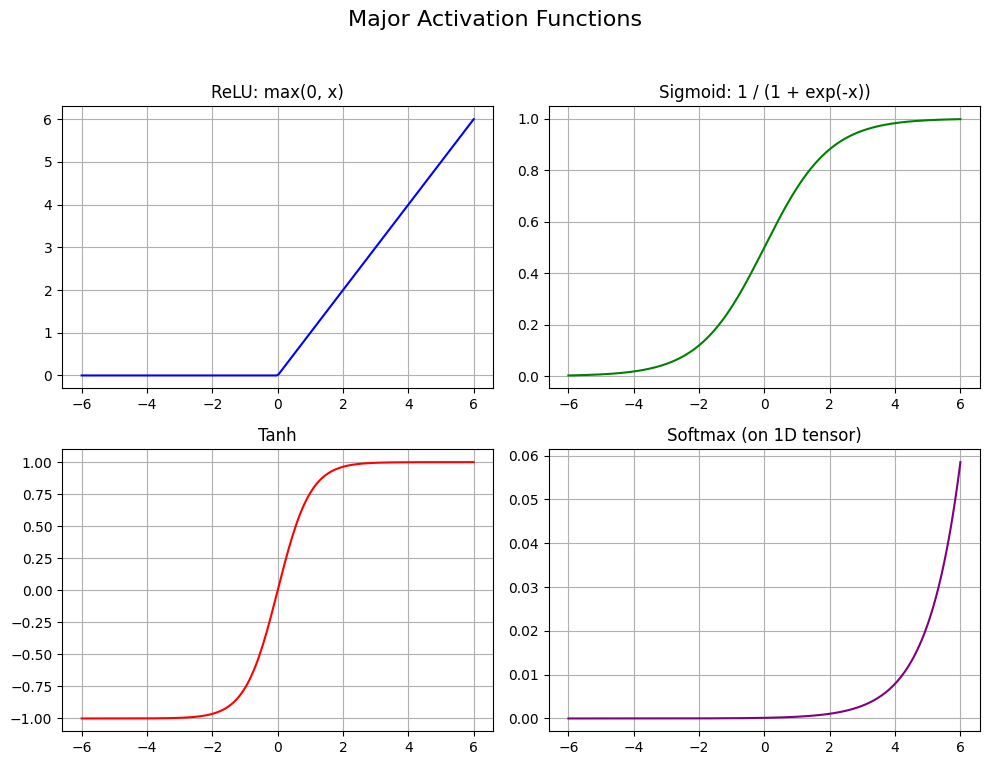

In [64]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


x = torch.linspace(-6, 6, 200)


# 활성화 함수 적용
y_relu = F.relu(x)
y_sigmoid = F.sigmoid(x)
y_tanh = F.tanh(x)
y_softmax = F.softmax(x, dim=0) # 1D 텐서에 적용


# 시각화
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Major Activation Functions', fontsize=16)


axes[0, 0].plot(x.numpy(), y_relu.numpy(), color='blue')
axes[0, 0].set_title("ReLU: max(0, x)")
axes[0, 0].grid(True)


axes[0, 1].plot(x.numpy(), y_sigmoid.numpy(), color='green')
axes[0, 1].set_title("Sigmoid: 1 / (1 + exp(-x))")
axes[0, 1].grid(True)


axes[1, 0].plot(x.numpy(), y_tanh.numpy(), color='red')
axes[1, 0].set_title("Tanh")
axes[1, 0].grid(True)


axes[1, 1].plot(x.numpy(), y_softmax.numpy(), color='purple')
axes[1, 1].set_title("Softmax (on 1D tensor)")
axes[1, 1].grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # 로컬 환경에서 실행 시 주석 해제
